In [1]:
import requests
try:
    data = requests.get('https://people.sc.fsu.edu/~jburkardt/data/csv/grades.csv').text
    print('File Saved')
except Exception as E:
    print('Please Check You WiFi Connection')
file = open('test.csv', 'w')
file.write(data)
file.close()

File Saved


### Download Data from
## https://people.sc.fsu.edu/~jburkardt/data/csv/grades.csv

# Import Libs

In [2]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

# Read The Downloaded File

In [3]:
file = pd.read_csv('test.csv')

# Print Top 4 Rows

In [4]:
file.head(4)

,Last name,"""First name""","""SSN""","""Test1""","""Test2""","""Test3""","""Test4""","""Final""","""Grade"""
0,Alfalfa,"""Aloysius""","""123-45-6789""",40.0,90.0,100.0,83.0,49.0,"""D-"""
1,Alfred,"""University""","""123-12-1234""",41.0,97.0,96.0,97.0,48.0,"""D+"""
2,Gerty,"""Gramma""","""567-89-0123""",41.0,80.0,60.0,40.0,44.0,"""C"""
3,Android,"""Electric""","""087-65-4321""",42.0,23.0,36.0,45.0,47.0,"""B-"""


# Check All Columns

In [5]:
file.columns

Index(['Last name', ' "First name"', ' "SSN"', '        "Test1"', ' "Test2"',
       ' "Test3"', ' "Test4"', ' "Final"', ' "Grade"'],
      dtype='object')

# Create A Fun that deals with whitespace and quotes(")

In [6]:
def remove_space_and_quotes(x):
    return x.replace('"',"").replace(" ","")

# Filter Column Name 

In [7]:
file.columns = list(map(remove_space_and_quotes, file.columns))

# Check Output

In [8]:
file.head(2)

,Lastname,Firstname,SSN,Test1,Test2,Test3,Test4,Final,Grade
0,Alfalfa,"""Aloysius""","""123-45-6789""",40.0,90.0,100.0,83.0,49.0,"""D-"""
1,Alfred,"""University""","""123-12-1234""",41.0,97.0,96.0,97.0,48.0,"""D+"""


# Filter FirstName and remove Quote(")

In [9]:
file['Firstname'] = list( map(remove_space_and_quotes,file['Firstname']))

# We Can filter SSN Column and remove hypen(-)

In [10]:
file['SSN'] = list(
    map(lambda x:int(x.replace('-',"").
                     replace(' ',"").
                      replace('"',"")  )
                        ,file['SSN']))

In [11]:
file.head(4)

,Lastname,Firstname,SSN,Test1,Test2,Test3,Test4,Final,Grade
0,Alfalfa,Aloysius,123456789,40.0,90.0,100.0,83.0,49.0,"""D-"""
1,Alfred,University,123121234,41.0,97.0,96.0,97.0,48.0,"""D+"""
2,Gerty,Gramma,567890123,41.0,80.0,60.0,40.0,44.0,"""C"""
3,Android,Electric,87654321,42.0,23.0,36.0,45.0,47.0,"""B-"""


# Drop SSN, We Don't need this in Prediction

In [12]:
file.drop(['SSN'], axis=1, inplace=True)

# Drop Any Null Value if Exist

In [13]:
file.dropna(inplace=True)

# Importing Label Encoder for Encoding Grade

In [14]:
from sklearn.preprocessing import LabelEncoder

# Create Object of LabelEncoder Class

In [15]:
encoder = LabelEncoder()

# Filter Grade before Encoding

In [16]:
file['Grade'] = list(map(remove_space_and_quotes,file['Grade']))

# Time to Encode Grade

In [17]:
file['Grade']  = encoder.fit_transform(file['Grade'])

# Now Grade Converted to Numbers
# Let's Print Grade

In [18]:
file['Grade'].head(5)

0    9
1    8
2    5
3    4
4    1
Name: Grade, dtype: int64

# Here Comes the Regression 
## We Use Logistic Regresssion for Prediction Student Grade Bases On Test Marks

In [19]:
from sklearn.linear_model import LogisticRegression

# Create Obj Of LogisticRegression Class

In [69]:
model = LogisticRegression(C=100)

# Before Processing We need to check test Data-Type

In [70]:
file.dtypes

Lastname      object
Firstname     object
Test1        float64
Test2        float64
Test3        float64
Test4        float64
Final        float64
Grade          int64
dtype: object

# As We can See Some Test Result have Object Type 
## So we Need To Convert Them to Float

In [71]:
file['Test1'] = file['Test1'].astype('float')
file['Test2'] = file['Test2'].astype('float')
file['Test3'] = file['Test3'].astype('float')
file['Test4'] = file['Test4'].astype('float')
file['Final'] = file['Final'].astype('float')

# Time To Seperate X and Y

In [72]:
X = file.values[:,3:-1]
Y = file.values[:, -1].astype('int')

# Finaly Train The Model

In [73]:
model.fit(X,Y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Now we Check Accuracy Of Model

In [74]:
model.score(X,Y)

0.9333333333333333

# Predict Some Result

In [75]:
for x,y in zip(X,Y):
    x = model.predict([x])[0]
    print(f"Predicted \t{x}  \tActual \t{y} {'<- Error ' if x != y else ''}")

Predicted 	9  	Actual 	9 
Predicted 	8  	Actual 	8 
Predicted 	5  	Actual 	5 
Predicted 	4  	Actual 	4 
Predicted 	1  	Actual 	1 
Predicted 	7  	Actual 	7 
Predicted 	10  	Actual 	10 
Predicted 	3  	Actual 	3 
Predicted 	4  	Actual 	0 <- Error 
Predicted 	8  	Actual 	8 
Predicted 	6  	Actual 	6 
Predicted 	4  	Actual 	4 
Predicted 	4  	Actual 	4 
Predicted 	2  	Actual 	2 
Predicted 	5  	Actual 	5 


# Let's Plot

In [76]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
%matplotlib notebook

<IPython.core.display.Javascript object>


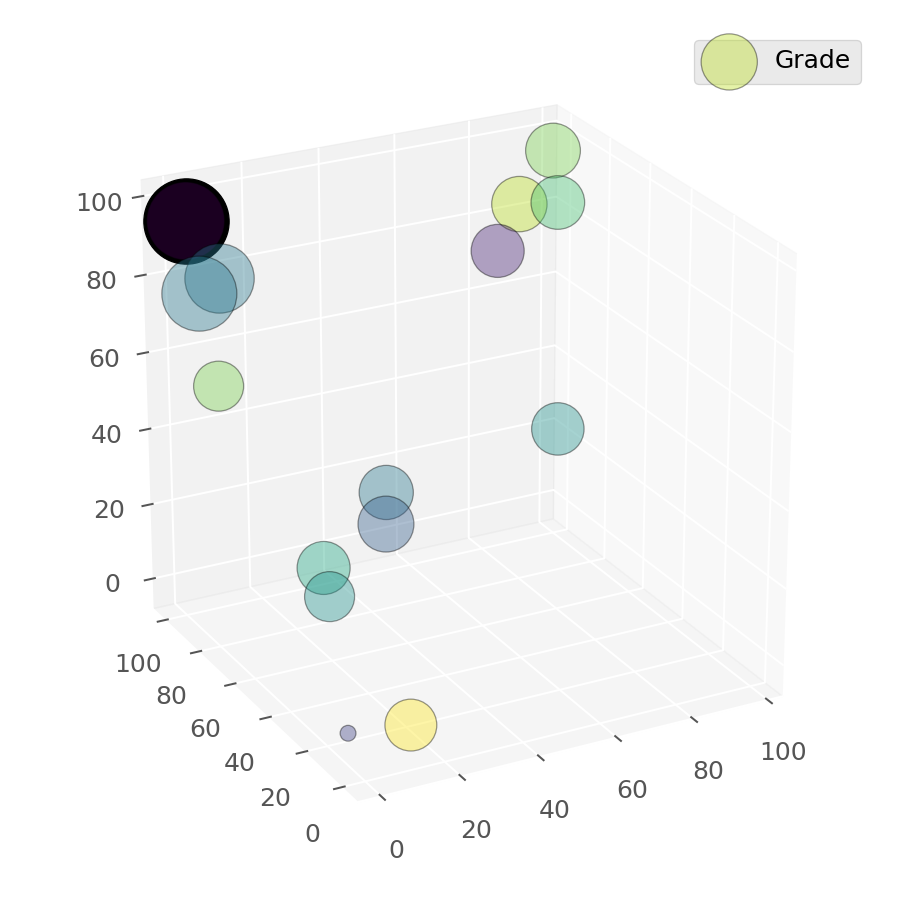

In [77]:
fig = plt.figure(figsize=(5,5),dpi=120)
ax = plt.subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2].astype('float'), c=Y, s=X[:,3].astype(float)*10, edgecolor='k', alpha=0.4,label='Grade')
ax.set_facecolor('white')

Y_cap = model.predict(X)

for i, x in enumerate(Y_cap != Y):
    if x:
        ax.scatter(X[i, 0], X[i, 1],  X[i, 2],
                   s=X[i, 3]*12, edgecolor='k',
                   c='k')
plt.tight_layout()
plt.legend()